#Muhamamad Khubaib - mk07218



In [26]:
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')
from nltk import pos_tag, word_tokenize, RegexpParser
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
from bs4 import BeautifulSoup
import requests
import re
import numpy

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
#Q1:

def url_to_string(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html, 'html.parser')
    for script in soup(["script", "style", 'aside']):
        script.extract()
        return " ".join(re.split(r'[\n\t]+', soup.get_text()))

In [28]:
nlp = en_core_web_sm.load()
ny_bb = url_to_string('https://ibsintelligence.com/ibsi-news/5-applications-of-artificial-intelligence-in-banking/')
article = nlp(ny_bb)
len(article.ents)

99

In [29]:
labels = [x.label_ for x in article.ents]
Counter(labels)

Counter({'CARDINAL': 8,
         'ORG': 46,
         'PERSON': 6,
         'GPE': 5,
         'LOC': 2,
         'DATE': 22,
         'WORK_OF_ART': 3,
         'ORDINAL': 2,
         'MONEY': 2,
         'PRODUCT': 1,
         'NORP': 2})

### The output above shows that there around 46 organizations, 6 persons, 5 GPE etc in the chosen article.

In [30]:
items = [x.text for x in article.ents]
Counter(items).most_common(5)

[('AI', 12),
 ('2023', 6),
 ('Artificial Intelligence', 4),
 ('1,500.00  / year', 4),
 ('5', 3)]

### The output above shows that AI is the most frequent word, whereas 2023 comes at second.

In [31]:
sentences = [x for x in article.sents]
print(sentences[19])

AI can detect specific patterns and correlations in the data, which legacy technology could not previously detect.


In [32]:
displacy.render(nlp(str(sentences[19])), jupyter=True, style='ent')

### The output shows the highlighted words that is organization in the 19th sentence of the article I have chosen.

In [33]:
[(x.orth_,x.pos_, x.lemma_) for x in [y
                                for y
                                in nlp(str(sentences[19]))
                                if not y.is_stop and y.pos_ != 'PUNCT']]

[('AI', 'PROPN', 'AI'),
 ('detect', 'VERB', 'detect'),
 ('specific', 'ADJ', 'specific'),
 ('patterns', 'NOUN', 'pattern'),
 ('correlations', 'NOUN', 'correlation'),
 ('data', 'NOUN', 'datum'),
 ('legacy', 'NOUN', 'legacy'),
 ('technology', 'NOUN', 'technology'),
 ('previously', 'ADV', 'previously'),
 ('detect', 'VERB', 'detect')]

### The output above shows all words that are Noun, verb, proper noun etc except for stop words and punctuation.

In [34]:
displacy.render(nlp(str(sentences)), jupyter=True, style='ent')

### The output above shows the highlighted words that are GPE, person, organization, location, date, money etc in the complete article I have chosen.

##Analysis
### The article I have chosen is about the use of AI in banking. The article has alot of organizations, locations, dates, and person mentioned in it making it very relevant to check the accuracy and precision of the NER model. The model has done the analyzing and classifying very well. The model has done a very good job in classifying the words and sentences in the article I have chosen.

In [50]:
#Q2

from tika import parser

raw = parser.from_file('data.pdf')
text = raw['content']
# print(text)

In [55]:
token_words = nltk.tokenize.word_tokenize(text)
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(["T", "J", "D", "S", "M", "Q", "H", "et al", "et", "pp", "a.", "m.", "d.", "j.", "s.", "r.", "c.", "t.", "s"])
no_stopwords = [word for word in token_words if word.lower() not in stopwords]
nonPunct = re.compile('.*[A-Za-z].*')
cleaned = [w for w in no_stopwords if nonPunct.match(w)]
filteredwordfreq = nltk.FreqDist(cleaned)
filteredwordfreq.most_common(10)

[('food', 126),
 ('tourism', 49),
 ('Tourism', 30),
 ('local', 28),
 ('may', 27),
 ('tourists', 27),
 ('experiences', 25),
 ('gastronomy', 24),
 ('experience', 24),
 ('one', 23)]

### The output above shows the 10 most frequent words in the research paper.

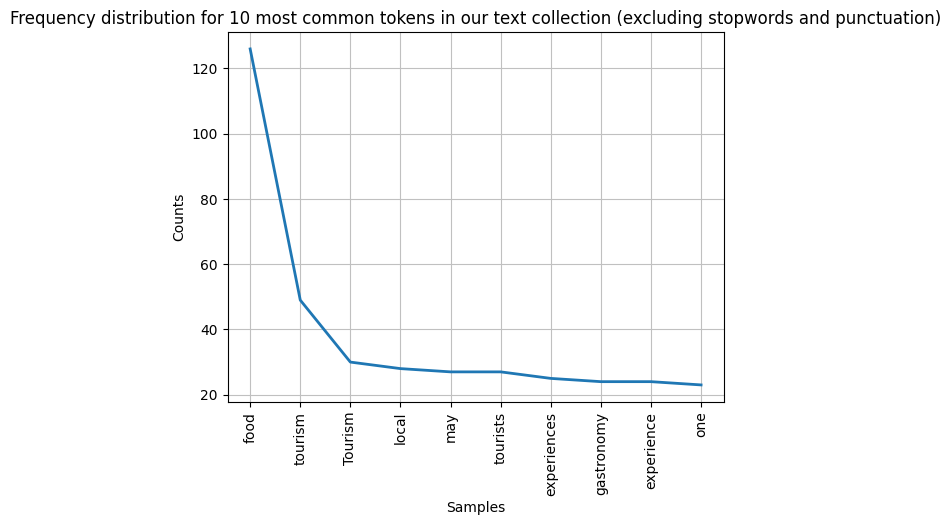

<Axes: title={'center': 'Frequency distribution for 10 most common tokens in our text collection (excluding stopwords and punctuation)'}, xlabel='Samples', ylabel='Counts'>

In [57]:
filteredwordfreq.plot(10, title="Frequency distribution for 10 most common tokens in our text collection (excluding stopwords and punctuation)")

In [60]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

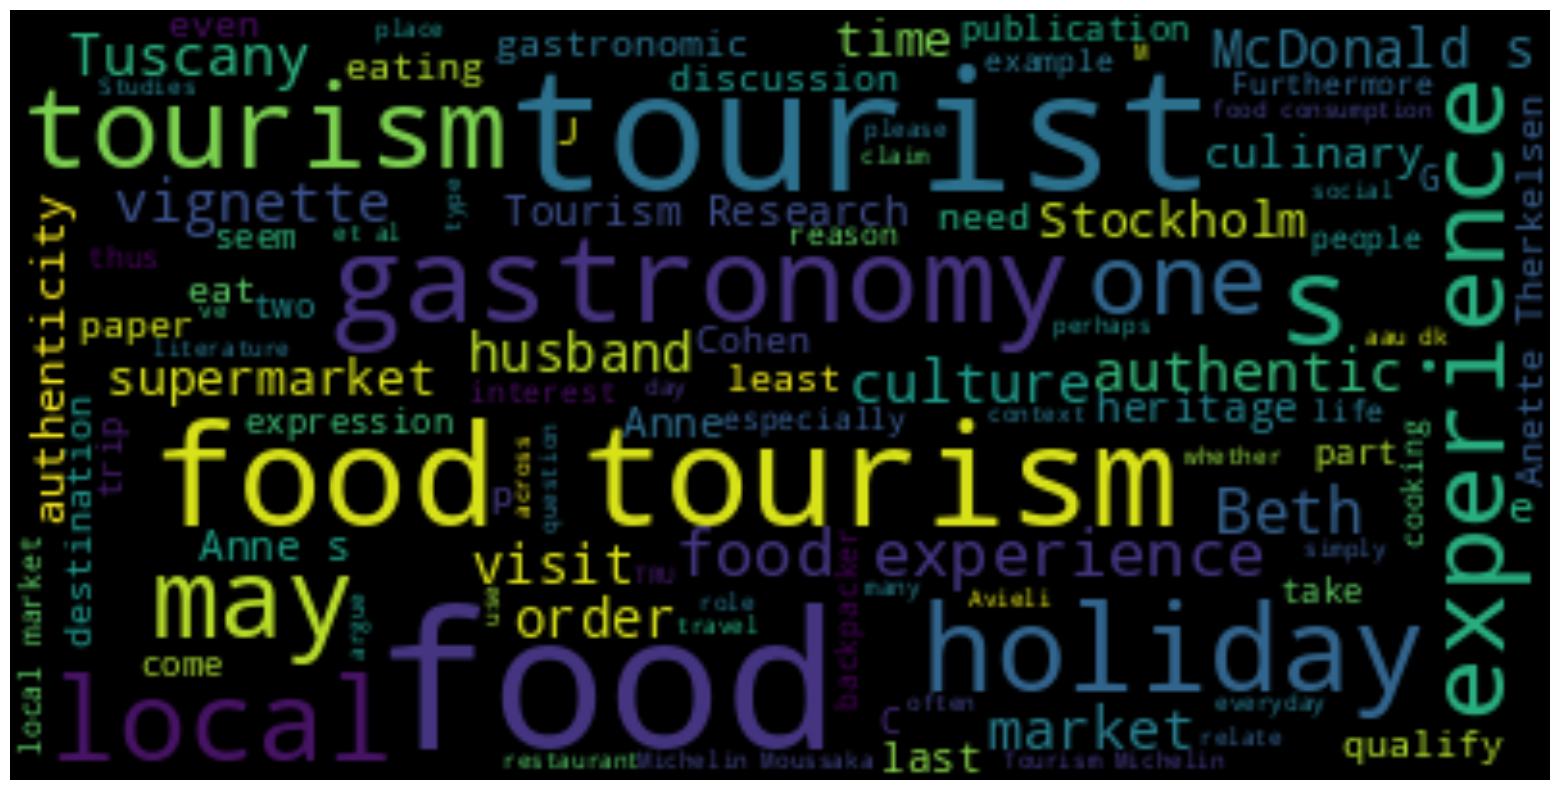

In [61]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

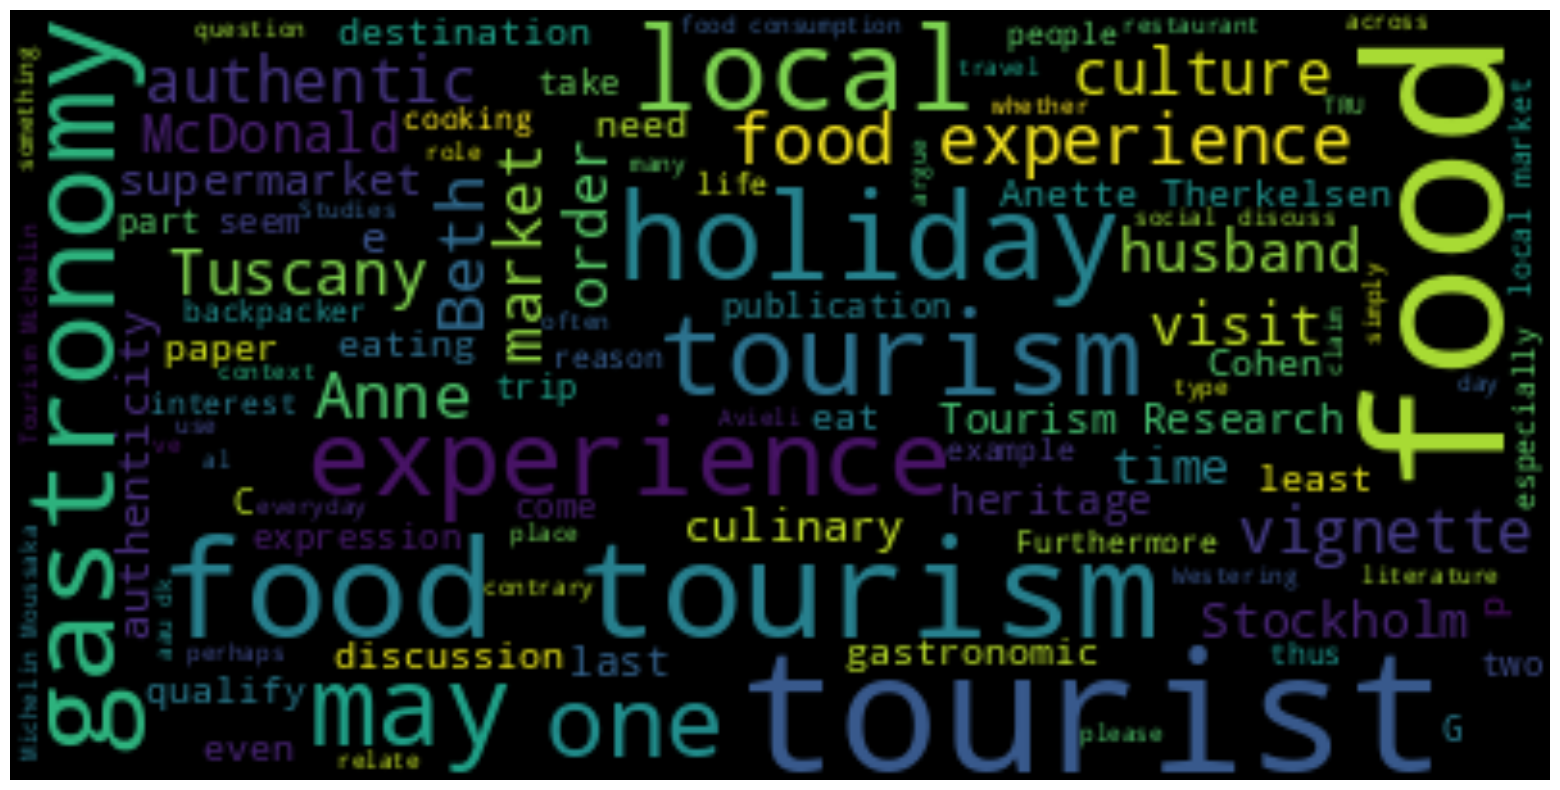

In [62]:
stopwords = set(STOPWORDS)
stopwords.update(["T", "J", "D", "S", "M", "Q", "H", "et al", "et", "pp", "a.", "m.", "d.", "j.", "s.", "r.", "c.", "t.", "s"])
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="black").generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [75]:
# !pip install yake

from rake_nltk import Rake
import yake
r = Rake()
r.extract_keywords_from_text(text)
r.get_ranked_phrases_with_scores()[:10]

[(222.67956110154904,
  'proof reading cirkeline kappel layout assistance ellen nyrup pedersen tru tourism research unit aalborg university fibigerstraede 2 dk'),
 (108.98313253012049,
  '9220 aalborg east tru tourism research unit campus copenhagen lautrupvang 2b dk'),
 (79.66040525739321,
  'tru – tourism research unit aalborg university denmark tru progress working paper'),
 (60.75, 'susanne jensen turisters kendskab til miljømærker og miljøtiltag'),
 (41.97076023391813, '‘ voyering grocery shopper ’ may even engage'),
 (36.0, '15th century renaissance castle near cortona'),
 (32.916666666666664,
  'global studies aalborg university distribution download'),
 (28.69973474801061,
  'makes familiar respectively unfamiliar food experiences'),
 (28.605555555555554, 'specific destination permeate many influential texts'),
 (27.472727272727273, '15972f2bee21 tru progress working paper')]

### The output above shows the keyphrases from the text along with their scores. The scores shows their importance or relevance within the context of the text.

In [76]:

kw_extractor = yake.KeywordExtractor()
language = "en"
max_ngram_size = 2
deduplication_threshold = 0.9
numOfKeywords = 20
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(text)
for kw in keywords:
    print(kw)

('food tourism', 0.0004075847504698307)
('Food', 0.0008179353102021248)
('food experiences', 0.0015999004907168329)
('Tourism', 0.0016287761019233074)
('Tourism Research', 0.0057523498599485684)
('Anette Therkelsen', 0.006317559330977983)
('food consumption', 0.008814734761084278)
('Anne', 0.008823658261029854)
('local food', 0.008916352910612277)
('experience', 0.009077682106048987)
('local', 0.009678756293228738)
('tourist', 0.009992083326066686)
('tourists', 0.009992083326066686)
('gastronomy', 0.010131088733060286)
('food tourists', 0.010177073566200632)
('Beth', 0.010918787127400978)
('Tuscany', 0.011828466443468034)
('Therkelsen Food', 0.011859547666501106)
('tourism Food', 0.015895805268323397)
('Therkelsen', 0.017759783694316654)


### The output above shows the most common words along with their score of importance in the chosen paper.

# Analysis

The paper I have chosen is on a research paper called 'Food and Tourism:
Michelin, Moussaka and McDonald's' that talks about how food plays an important role in tourism and how franchises earn from this.
A method employing frequency graphs was implemented to chart the most frequently occurring words in the document, which showed that food and tourism ranked amongst the top words, which makes sense.
One limitation was the treatment of words with similar meanings as separate entities. Sometimes words with starting capital letters were also treated as different entities.
The word cloud technique was employed for the visualization of key terms from the document, yielding effective outcomes.
For the task of automated keyword extraction, both Rake and Yake libraries were utilized. The output of Yake seemed more significant than that of Rake.

In [115]:
#Q3 - part A

ttext = open('Tweets.txt','r')
corpus = ttext.read()
print(corpus)

A lucky fan of Babar Azam came to met him and he bring a gift for Babar.
Babar being single.
This is going to be me in the future opening a restaurant for Babar azam.
Pakistan has chased 200 only three times in T20I history. In all these chases, Babar was the man of the match. 
Sarfaraz Ahmed - Babar Azam is very involved in the team's plans and also helps Captain Shan Masood.
Babar is a pathetic player.
Babar and Imam ul Haq at a Restaurant in Canberra.
The team doesn't need Babar anymore.
King Babar doing batting practice in nets- it's pleasure for eyes to see him in nets.
New hat looks very cool on Babar.


In [116]:
#part B

from textblob import TextBlob
corpus = corpus.splitlines()

positive = 0
negative = 0
nuetral = 0

for line in corpus:
    analysis = TextBlob(line)
    print(line, analysis.sentiment)
    if analysis.sentiment.polarity > 0:
        positive = positive + 1
    elif analysis.sentiment.polarity < 0:
        negative = negative + 1
    else:
        nuetral = nuetral + 1

print("Positive Tweets: ", positive)
print("Negative Tweets: ", negative)
print("Neutral Tweets: ", nuetral)



A lucky fan of Babar Azam came to met him and he bring a gift for Babar. Sentiment(polarity=0.3333333333333333, subjectivity=0.8333333333333334)
Babar being single. Sentiment(polarity=-0.07142857142857142, subjectivity=0.21428571428571427)
This is going to be me in the future opening a restaurant for Babar azam. Sentiment(polarity=0.0, subjectivity=0.125)
Pakistan has chased 200 only three times in T20I history. In all these chases, Babar was the man of the match.  Sentiment(polarity=0.0, subjectivity=1.0)
Sarfaraz Ahmed - Babar Azam is very involved in the team's plans and also helps Captain Shan Masood. Sentiment(polarity=0.2, subjectivity=0.3)
Babar is a pathetic player. Sentiment(polarity=-1.0, subjectivity=1.0)
Babar and Imam ul Haq at a Restaurant in Canberra. Sentiment(polarity=0.0, subjectivity=0.0)
The team doesn't need Babar anymore. Sentiment(polarity=0.0, subjectivity=0.0)
King Babar doing batting practice in nets- it's pleasure for eyes to see him in nets. Sentiment(polari

In [112]:
#part C

from textblob import TextBlob

high = 0
low = 0
highesttweet = ""
lowesttweet = ""

for line in corpus:
    analysis = TextBlob(line)
    if analysis.sentiment.polarity >= 0:
        if analysis.sentiment.polarity > high:
            high = analysis.sentiment.polarity
            highesttweet = line
    elif analysis.sentiment.polarity < 0:
        if analysis.sentiment.polarity < low:
            low = analysis.sentiment.polarity
            lowesttweet = line

print("Lowest polarity: ", low)
print("The tweet: ", lowesttweet)
print("Highest polarity: ", high)
print("The tweet: ", highesttweet)


Lowest polarity:  -1.0
The tweet:  Babar is a pathetic player.
Highest polarity:  0.3333333333333333
The tweet:  A lucky fan of Babar Azam came to met him and he bring a gift for Babar.


### The algorithm is very accurate. The positive tweet talks about how Babar is a great player and is loved by the people. This is becasue he has made many records and is considered a world class player. The negative tweet talk about how Babar is not a great player anymore and should not be on the team. This is accurate as his performance and captaincy in the recent WC was not on par. The algorithm has done a very good job in classifying the tweets as positive and negative.